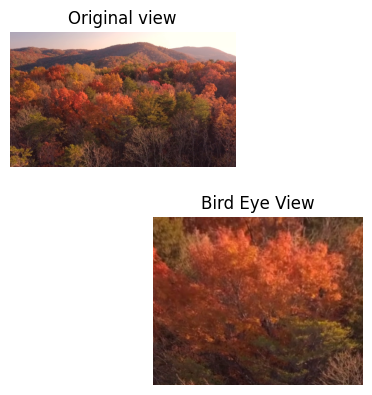

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


video = cv.VideoCapture("C:/Users/ragha/Downloads/trees.mp4")

while True:
    ret , frame = video.read()
    if not ret:
        break
    
    frame  = cv.resize(frame , (1000,600))
    
    src_pts = np.float32([
               [280,500],
               [600,480],
               [350,260],
               [550,260]
    ])
    dst_pts = np.float32([
                 [0,400],
                 [500,400],
                 [0,0],
                 [500,0]
    ])
    M = cv.getPerspectiveTransform(src_pts , dst_pts)
    bird_view = cv.warpPerspective(frame , M , (500,400))

    cv.imshow("Original Video" , frame)
    cv.imshow("bird view" , bird_view)
    frame =  cv.cvtColor(frame , cv.COLOR_BGR2RGB)
    plt.subplot(2 , 2 , 1)
    plt.imshow(frame , cmap = 'grey')
    plt.axis("OFF")
    plt.title("Original view")

    bird_view = cv.cvtColor(bird_view , cv.COLOR_BGR2RGB)
    plt.subplot(2,1,2)  
    plt.imshow(bird_view)
    plt.axis("OFF")
    plt.title("Bird Eye View")
    if cv.waitKey(25) & 0xFF == ord('q'):
        break


video.release()
cv.destroyAllWindows()    